## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("/content/Data/cardio_data_processed.csv")
application_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [2]:
# Drop the non-beneficial columns, age, id, bp_category
application_df.drop(columns=['age','id', 'bp_category'], axis=1, inplace = True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

gender                    2
height                  106
weight                  278
ap_hi                    86
ap_lo                    58
cholesterol               3
gluc                      3
smoke                     2
alco                      2
active                    2
cardio                    2
age_years                28
bmi                    3738
bp_category_encoded       4
dtype: int64

In [4]:
# Finding the max for each column
maximum = application_df.max()
print(maximum)

gender                          2
height                        250
weight                      200.0
ap_hi                         180
ap_lo                         120
cholesterol                     3
gluc                            3
smoke                           1
alco                            1
active                          1
cardio                          1
age_years                      64
bmi                    298.666667
bp_category_encoded        Normal
dtype: object


In [5]:
# Finding the min for each column
minimum = application_df.min()
print(minimum)

gender                        1
height                       55
weight                     11.0
ap_hi                        90
ap_lo                        60
cholesterol                   1
gluc                          1
smoke                         0
alco                          0
active                        0
cardio                        0
age_years                    29
bmi                    3.471784
bp_category_encoded    Elevated
dtype: object


In [6]:
# Looking at the data type for each column
application_df.dtypes

gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category_encoded     object
dtype: object

**Eliminated Outliers**

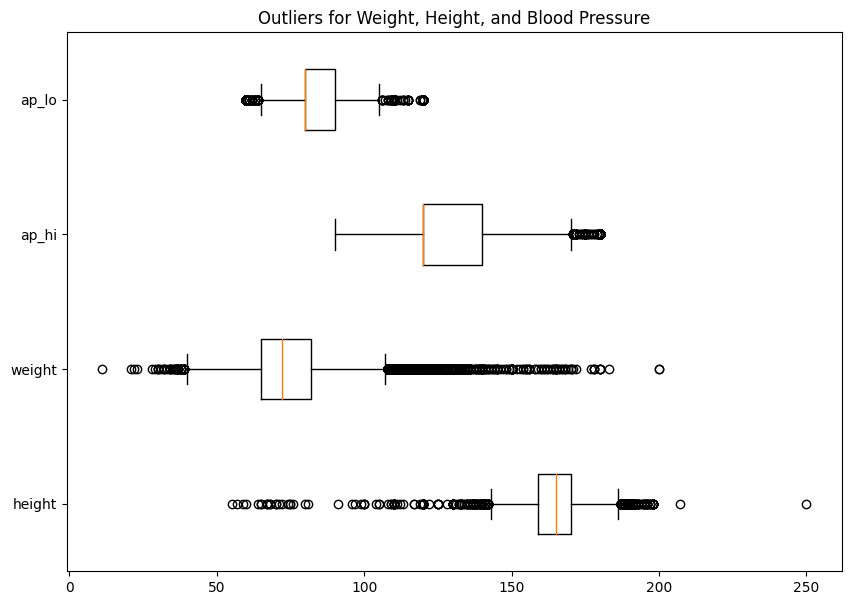

In [7]:
import matplotlib.pyplot as plt
# Checking for outliers
height_data = application_df['height']
weight_data = application_df['weight']
api_hi = application_df['ap_hi']
api_lo = application_df['ap_lo']
data = [height_data, weight_data, api_hi, api_lo]
fig = plt.figure(figsize = (10, 7))
plt.boxplot(data, labels = ['height', 'weight', 'ap_hi', 'ap_lo'], vert = False)
plt.title('Outliers for Weight, Height, and Blood Pressure')
plt.show()

In [8]:
# Calculate outliers for height
quartiles =height_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of height is: {lowerq}")
print(f"The upper quartile of height is: {upperq}")
print(f"The interquartile range of height is: {iqr}")
print(f"The the median of height is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of height is: 159.0
The upper quartile of height is: 170.0
The interquartile range of height is: 11.0
The the median of height is: 165.0 
Values below 142.5 could be outliers.
Values above 186.5 could be outliers.


In [9]:
# Eliminate outliers from the data for height
application_df = application_df.loc[(application_df['height']>142) & (application_df['height']<187),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [10]:
# Calculate outliers for Systolic blood pressure (ap_hi)
quartiles = api_hi.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of systolic blood pressure is: {lowerq}")
print(f"The upper quartile of systolic blood pressure is: {upperq}")
print(f"The interquartile range of systolic blood pressure is: {iqr}")
print(f"The the median of systolic blood pressure is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of systolic blood pressure is: 120.0
The upper quartile of systolic blood pressure is: 140.0
The interquartile range of systolic blood pressure is: 20.0
The the median of systolic blood pressure is: 120.0 
Values below 90.0 could be outliers.
Values above 170.0 could be outliers.


In [11]:
application_df = application_df.loc[(application_df['ap_hi']>89.5) & (application_df['ap_hi']<170.5),:]
application_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68199,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [12]:
# Calculate outliers for Diastolic blood pressuree (ap_lo)
quartiles = api_lo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of diastolic blood pressure is: {lowerq}")
print(f"The upper quartile of diastolic blood pressure is: {upperq}")
print(f"The interquartile range of diastolic blood pressure is: {iqr}")
print(f"The the median of diastolic blood pressure is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of diastolic blood pressure is: 80.0
The upper quartile of diastolic blood pressure is: 90.0
The interquartile range of diastolic blood pressure is: 10.0
The the median of diastolic blood pressure is: 80.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.


In [13]:
# Delete height and weight column as they are no longer needed
application_df = application_df.drop(columns = ['height', 'weight', 'ap_hi', 'ap_lo'])
application_df

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,1,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...
68199,1,1,1,0,0,1,1,57,29.384757,Hypertension Stage 1
68200,2,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68203,1,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1


In [14]:
# Looking at the updated minimum for bmi
minimum = application_df.min()
print(minimum)

gender                        1
cholesterol                   1
gluc                          1
smoke                         0
alco                          0
active                        0
cardio                        0
age_years                    29
bmi                    3.471784
bp_category_encoded    Elevated
dtype: object


In [15]:
# Looking at the updated minimum for bmi
maximum = application_df.max()
print(maximum)

gender                         2
cholesterol                    3
gluc                           3
smoke                          1
alco                           1
active                         1
cardio                         1
age_years                     64
bmi                    68.308315
bp_category_encoded       Normal
dtype: object


**Encode Data**

In [16]:
# Transform pb_category_encoded column using get dummies
bp_category_df = pd.get_dummies(application_df['bp_category_encoded'])
bp_category_df.head(5)

,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [17]:
# Concatenate bp_category_df and application_df DataFrame
application_df = pd.concat([application_df, bp_category_df], axis=1)
# Drop the original bp_category_encoded column
application_df = application_df.drop(columns=['bp_category_encoded'])
# Display DataFrame
application_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,50,21.967120,0,1,0,0
1,1,3,1,0,0,1,1,55,34.927679,0,0,1,0
2,1,3,1,0,0,0,1,51,23.507805,0,1,0,0
3,2,1,1,0,0,1,1,48,28.710479,0,0,1,0
4,1,1,1,0,0,0,0,47,23.011177,0,0,0,1


In [18]:
# Encoding bmi column using a custom function
def encode_bmi(bmi):
  # This function encodes bmi by setting underweight as 0, healthy weight as 1, overweight as 2, obesity as 3, very obesity 4, and severe obesity as 5
  if bmi < 18.5:
    return 0
  elif bmi <25:
    return 1
  elif bmi < 30:
    return 2
  elif bmi < 35:
    return 3
  elif bmi < 40:
    return 4
  else:
    return 5

# Call the encode bmi function on the bmi column
application_df['bmi'] = application_df['bmi'].apply(encode_bmi)

# Review DataFrame
application_df.head()


,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,50,1,0,1,0,0
1,1,3,1,0,0,1,1,55,3,0,0,1,0
2,1,3,1,0,0,0,1,51,1,0,1,0,0
3,2,1,1,0,0,1,1,48,2,0,0,1,0
4,1,1,1,0,0,0,0,47,1,0,0,0,1


In [19]:
# Encoding age column using a custom function
def encode_age(age):
  # This function encodes age by setting 35 years and under as 0, 35-39 years as 1, 40-44 years as 2, 45-49 years as 3,
  # 50-54 years as 4, 55-59 years as 5, 60+ years as 6
  if age <35:
    return 0
  elif age <40:
    return 1
  elif age <45:
    return 2
  elif age <50:
    return 3
  elif age <55:
    return 4
  elif age <60:
    return 5
  else:
    return 6

# Call the encode age function on the age column
application_df['age_years'] = application_df['age_years'].apply(encode_age)

# Review DataFrame
application_df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,0,1,0,4,1,0,1,0,0
1,1,3,1,0,0,1,1,5,3,0,0,1,0
2,1,3,1,0,0,0,1,4,1,0,1,0,0
3,2,1,1,0,0,1,1,3,2,0,0,1,0
4,1,1,1,0,0,0,0,3,1,0,0,0,1


In [20]:
application_df.dtypes

gender                  int64
cholesterol             int64
gluc                    int64
smoke                   int64
alco                    int64
active                  int64
cardio                  int64
age_years               int64
bmi                     int64
Elevated                uint8
Hypertension Stage 1    uint8
Hypertension Stage 2    uint8
Normal                  uint8
dtype: object

In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df['cardio'].values
application_df = application_df.drop(columns=['cardio'])
X = application_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [23]:
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 9


nn_model = tf.keras.models.Sequential()

# First hidden layer

nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh") )
# Second hidden layer

nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 39        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 9)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 123 (492.00 Byte)
Trainable params: 123 (492.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=7, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

Epoch 1/7
1572/1572 [==============================] - 8s 5ms/step - loss: 0.6184 - accuracy: 0.6597 - val_loss: 0.9602 - val_accuracy: 0.4909
Epoch 2/7
1572/1572 [==============================] - 6s 4ms/step - loss: 0.5892 - accuracy: 0.6947 - val_loss: 0.9026 - val_accuracy: 0.4909
Epoch 3/7
1572/1572 [==============================] - 5s 3ms/step - loss: 0.5870 - accuracy: 0.6961 - val_loss: 0.9028 - val_accuracy: 0.4909
Epoch 4/7
1572/1572 [==============================] - 4s 3ms/step - loss: 0.5859 - accuracy: 0.6977 - val_loss: 0.9209 - val_accuracy: 0.4909
Epoch 5/7
1572/1572 [==============================] - 5s 3ms/step - loss: 0.5851 - accuracy: 0.6982 - val_loss: 0.9528 - val_accuracy: 0.4909
Epoch 6/7
1572/1572 [==============================] - 5s 3ms/step - loss: 0.5849 - accuracy: 0.6985 - val_loss: 0.9334 - val_accuracy: 0.4909
Epoch 7/7
1572/1572 [==============================] - 5s 3ms/step - loss: 0.5843 - accuracy: 0.6973 - val_loss: 0.9419 - val_accuracy: 0.4909

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

524/524 - 1s - loss: 0.5791 - accuracy: 0.7021 - 802ms/epoch - 2ms/step
Loss: 0.5790609121322632, Accuracy: 0.7021352648735046


In [28]:
# Checking what dictionaries are available to use for graphing accuracy
history_dict = fit_model.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


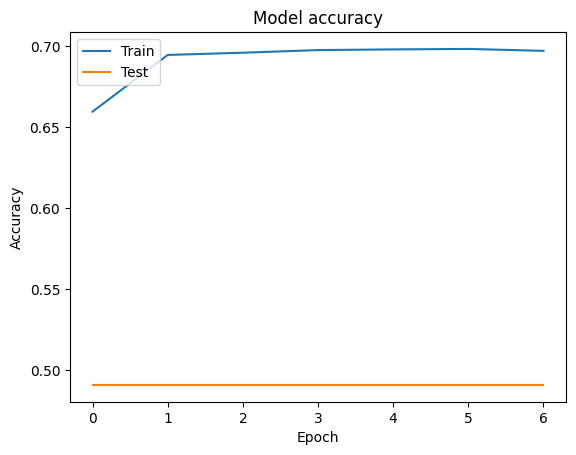

In [29]:
# Plot training & validation accuracy values
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
import numpy as np

# Make predictions on the test data
prediction = nn_model.predict(X_test_scaled)
# Convert the predictions to binary classes (assuming a threshold of 0.5)
y_pred_binary = (prediction > 0.5).astype(int)


524/524 [==============================] - 2s 4ms/step


In [38]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix

array([[6460, 2076],
       [2918, 5312]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      8536
           1       0.72      0.65      0.68      8230

    accuracy                           0.70     16766
   macro avg       0.70      0.70      0.70     16766
weighted avg       0.70      0.70      0.70     16766



In [40]:
from sklearn.metrics import auc, roc_curve
y_pred = nn_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

524/524 [==============================] - 1s 2ms/step


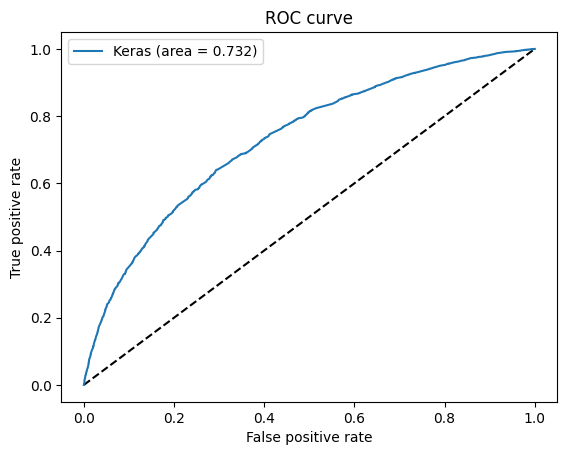

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

**Import Patient Data**

In [ ]:
# Patient data and putting in a DataFrame for ease of use
# Alternatively, you can import csv file
patientE = pd.DataFrame([{'id':68205,
                         'age': 16365,
                         'gender': 2,
                         'weight': 87.5,
                          'height':156,
                         'ap_hi': 188,
                         'ap_lo':106,
                         'cholestrol': 1,
                         'gluc': 1,
                         'smoke':0,
                         'alco': 1,
                         'active': 1,
                         'age_years': 44,
                         'bmi': 35.3,
                         "bp_category": "Hypertension Stage 2",
                         "bp_category_encoded": 'Hypertension Stage 2'}])
patientE

,id,age,gender,weight,height,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,age_years,bmi,bp_category,bp_category_encoded
0,68205,16365,2,87.5,156,188,106,1,1,0,1,1,44,35.3,Hypertension Stage 2,Hypertension Stage 2


In [ ]:
# Drop the non-beneficial ID columns, age, weight, height, ap_hi, ap_low
patientE.drop(columns=['age','id', 'bp_category', 'ap_hi', 'ap_lo', 'height', 'weight'], axis=1, inplace = True)
patientE

,gender,cholestrol,gluc,smoke,alco,active,age_years,bmi,bp_category_encoded
0,2,1,1,0,1,1,44,35.3,Hypertension Stage 2


In [ ]:
#we are going to concat the columns to make it a dummy column like the model.  We do not need all the columns present in the model as it will put the data in the correct column in the model
#The model is capable of taking in more or less data as a test for prediction.

# Define a mapping for the categories to columns
category_to_columns = {
    'Elevated': 'Elevated',
    'Hypertension Stage 1': 'Hypertension Stage 1',
    'Hypertension Stage 2': 'Hypertension Stage 2',
    'Normal': 'Normal',
}

# Set '1' for the corresponding category and '0' for the rest
patientE['Elevated'] = (patientE['bp_category_encoded'] == 'Elevated').astype(int)
patientE['Hypertension Stage 1'] = (patientE['bp_category_encoded'] == 'Hypertension Stage 1').astype(int)
patientE['Hypertension Stage 2'] = (patientE['bp_category_encoded'] == 'Hypertension Stage 2').astype(int)
patientE['Normal'] = (patientE['bp_category_encoded'] == 'Normal').astype(int)

patientE = patientE.drop('bp_category_encoded', axis=1)

In [ ]:
# Encoding bmi column using a custom function
def encode_bmi(bmi):
  # This function encodes bmi by setting underweight as 0, healthy weight as 1, overweight as 2, obesity as 3, very obesity 4, and severe obesity as 5
  if bmi < 18.5:
    return 0
  elif bmi <25:
    return 1
  elif bmi < 30:
    return 2
  elif bmi < 35:
    return 3
  elif bmi < 40:
    return 4
  else:
    return 5

# Call the encode bmi function on the bmi column
patientE['bmi'] = patientE['bmi'].apply(encode_bmi)

# Review DataFrame
patientE

,gender,cholestrol,gluc,smoke,alco,active,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,1,1,44,4,0,0,1,0


In [ ]:
# Encoding age column using a custom function
def encode_age(age):
  # This function encodes age by setting 35 years and under as 0, 35-39 years as 1, 40-44 years as 2, 45-49 years as 3,
  # 50-54 years as 4, 55-59 years as 5, 60+ years as 6
  if age <35:
    return 0
  elif age <40:
    return 1
  elif age <45:
    return 2
  elif age <50:
    return 3
  elif age <55:
    return 4
  elif age <60:
    return 5
  else:
    return 6

# Call the encode age function on the age column
patientE['age_years'] = patientE['age_years'].apply(encode_age)

# Review DataFrame
patientE

,gender,cholestrol,gluc,smoke,alco,active,age_years,bmi,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
0,2,1,1,0,1,1,2,4,0,0,1,0


In [ ]:
patientE.shape

(1, 12)

In [ ]:
# Using model to make prediction for PatientE
nn_model.predict(patientE).round()

1/1 [==============================] - 0s 41ms/step


array([[1.]], dtype=float32)